# Что нужно сделать, чтобы пройти курс

Установить miniconda: https://docs.conda.io/en/latest/miniconda.html и научиться её активировать (google запрос "how to activate miniconda" должен вам помочь)

С помощью pip установить следующие пакеты:

- numpy
- scikit-learn
- seaborn
- pandas
- skimage
- SciencePlots
- jupyter-notebook

Делается это так: после того, как Вы активировали miniconda, в терминале набираете -- pip install package_name (например, хочу установить пакет scikit-learn делаю это так: **pip install scikit-learn** и жму Enter)

В общем, на первое время это всё, что нужно

# Лекция 1: Различные постановки задач ML. Обзор алгоритмов ML

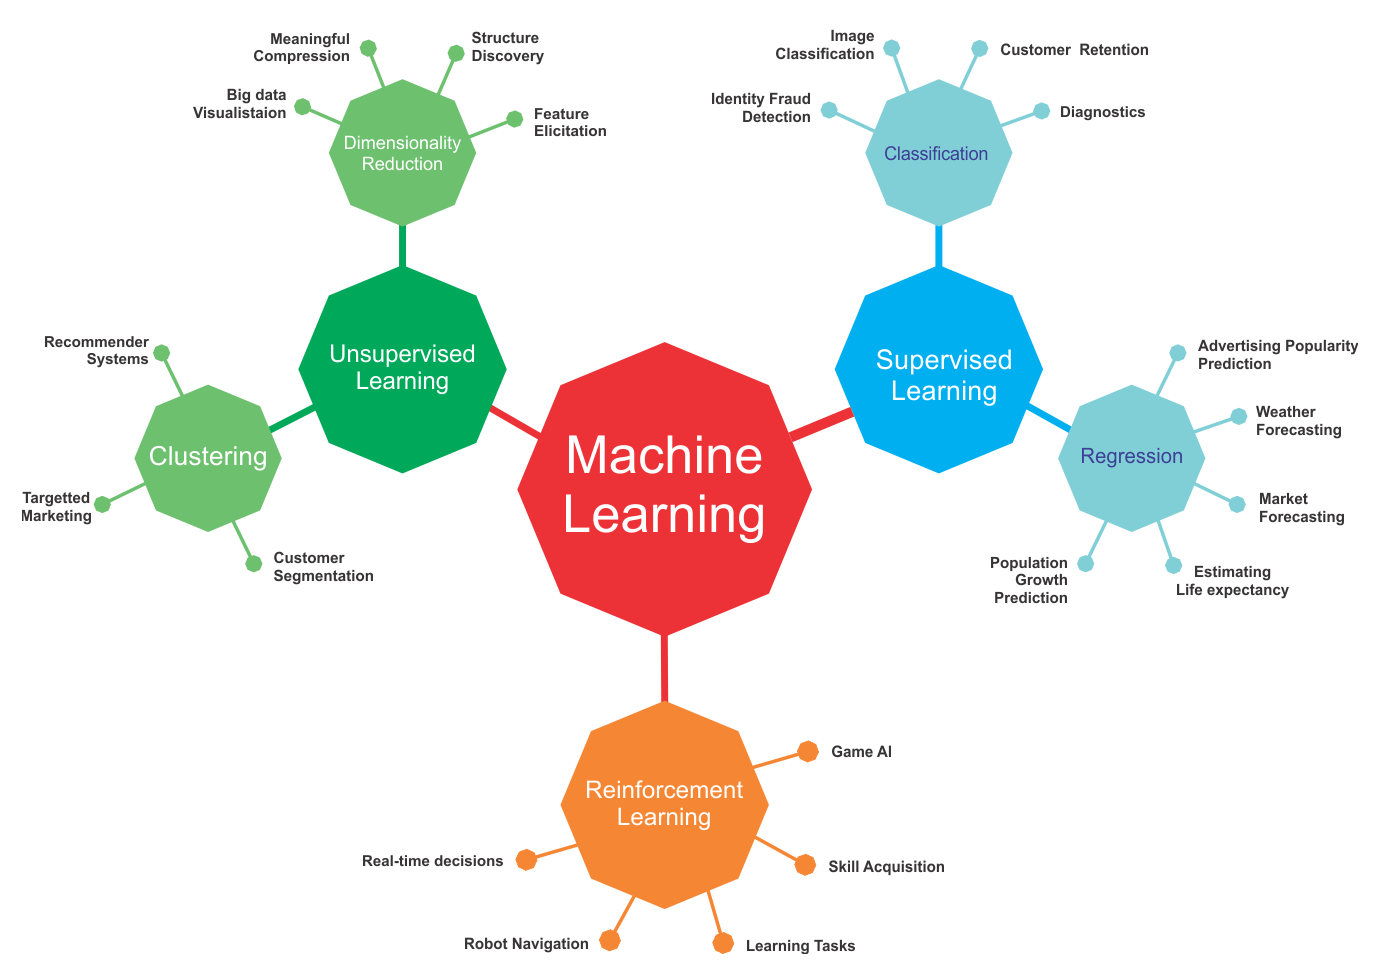

Источник: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789345070/1/ch01lvl1sec12/ml-tasks

# Классификация

У нас имеется набор наблюдений (признаки), эти наблюдения разбиты на классы (мы знаем к какому классу принадлежит каждое наблюдение). К нам поступает новый пример, класс которого мы не знаем. Задача -- на основе данных, для которых классы известны, определить класс нового примера

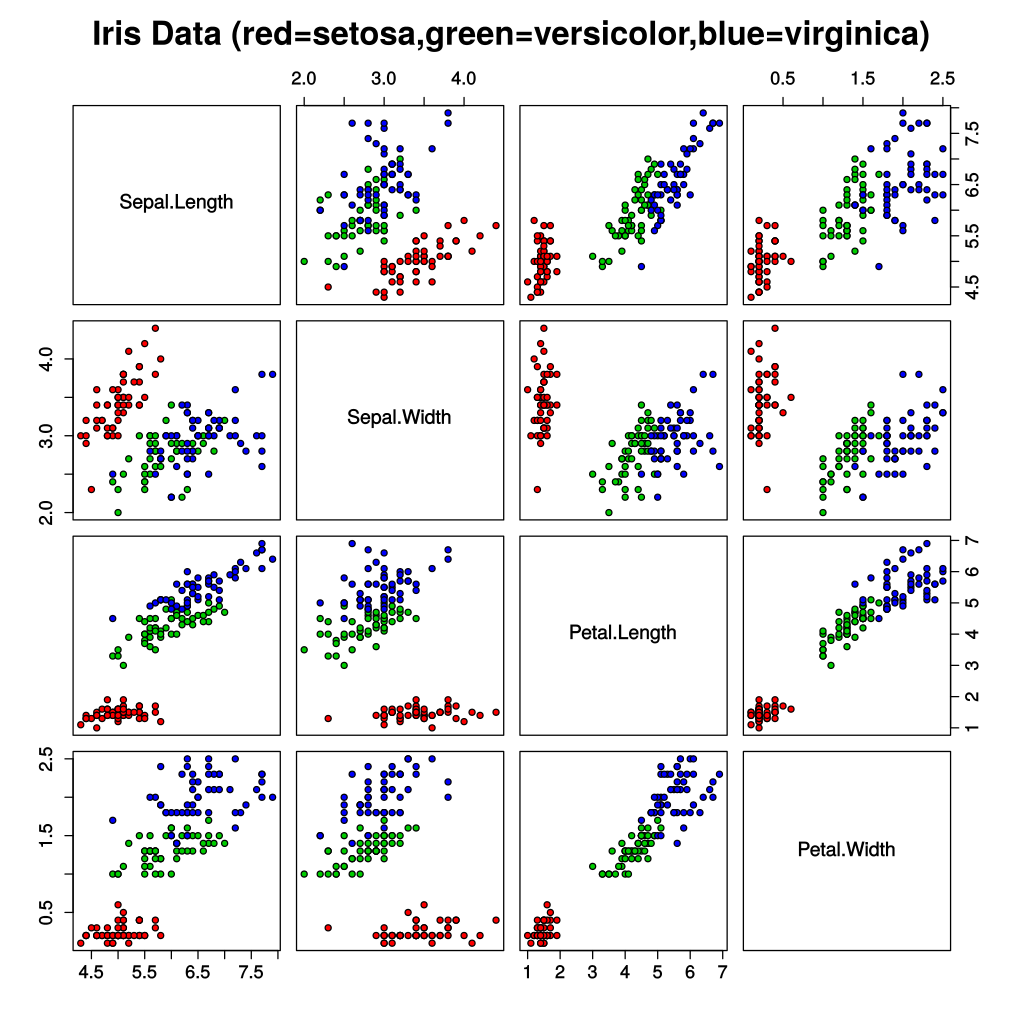

Источник: https://en.wikipedia.org/wiki/Iris_flower_data_set

Классификация может быть бинарной -- это когда два класса, или мультиклассовой -- это когда классов больше, чем два

# Регрессия

У нас есть наблюдения, и для каждого наблюдения имеется значение какой-то переменной, которая зависит от наблюдения. Задача состоит в том, чтобы восстановить эту зависимость

In [1]:
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
plt.style.use(['science', 'no-latex',  'high-contrast'])

In [54]:
X = np.random.normal(0, 2, 100)
Y = 2 + X + X**2 + X**3 + np.random.normal(0, 5, size=100)
vals = np.linspace(-5, 5)
f = 2 + vals + vals**2 + vals**3

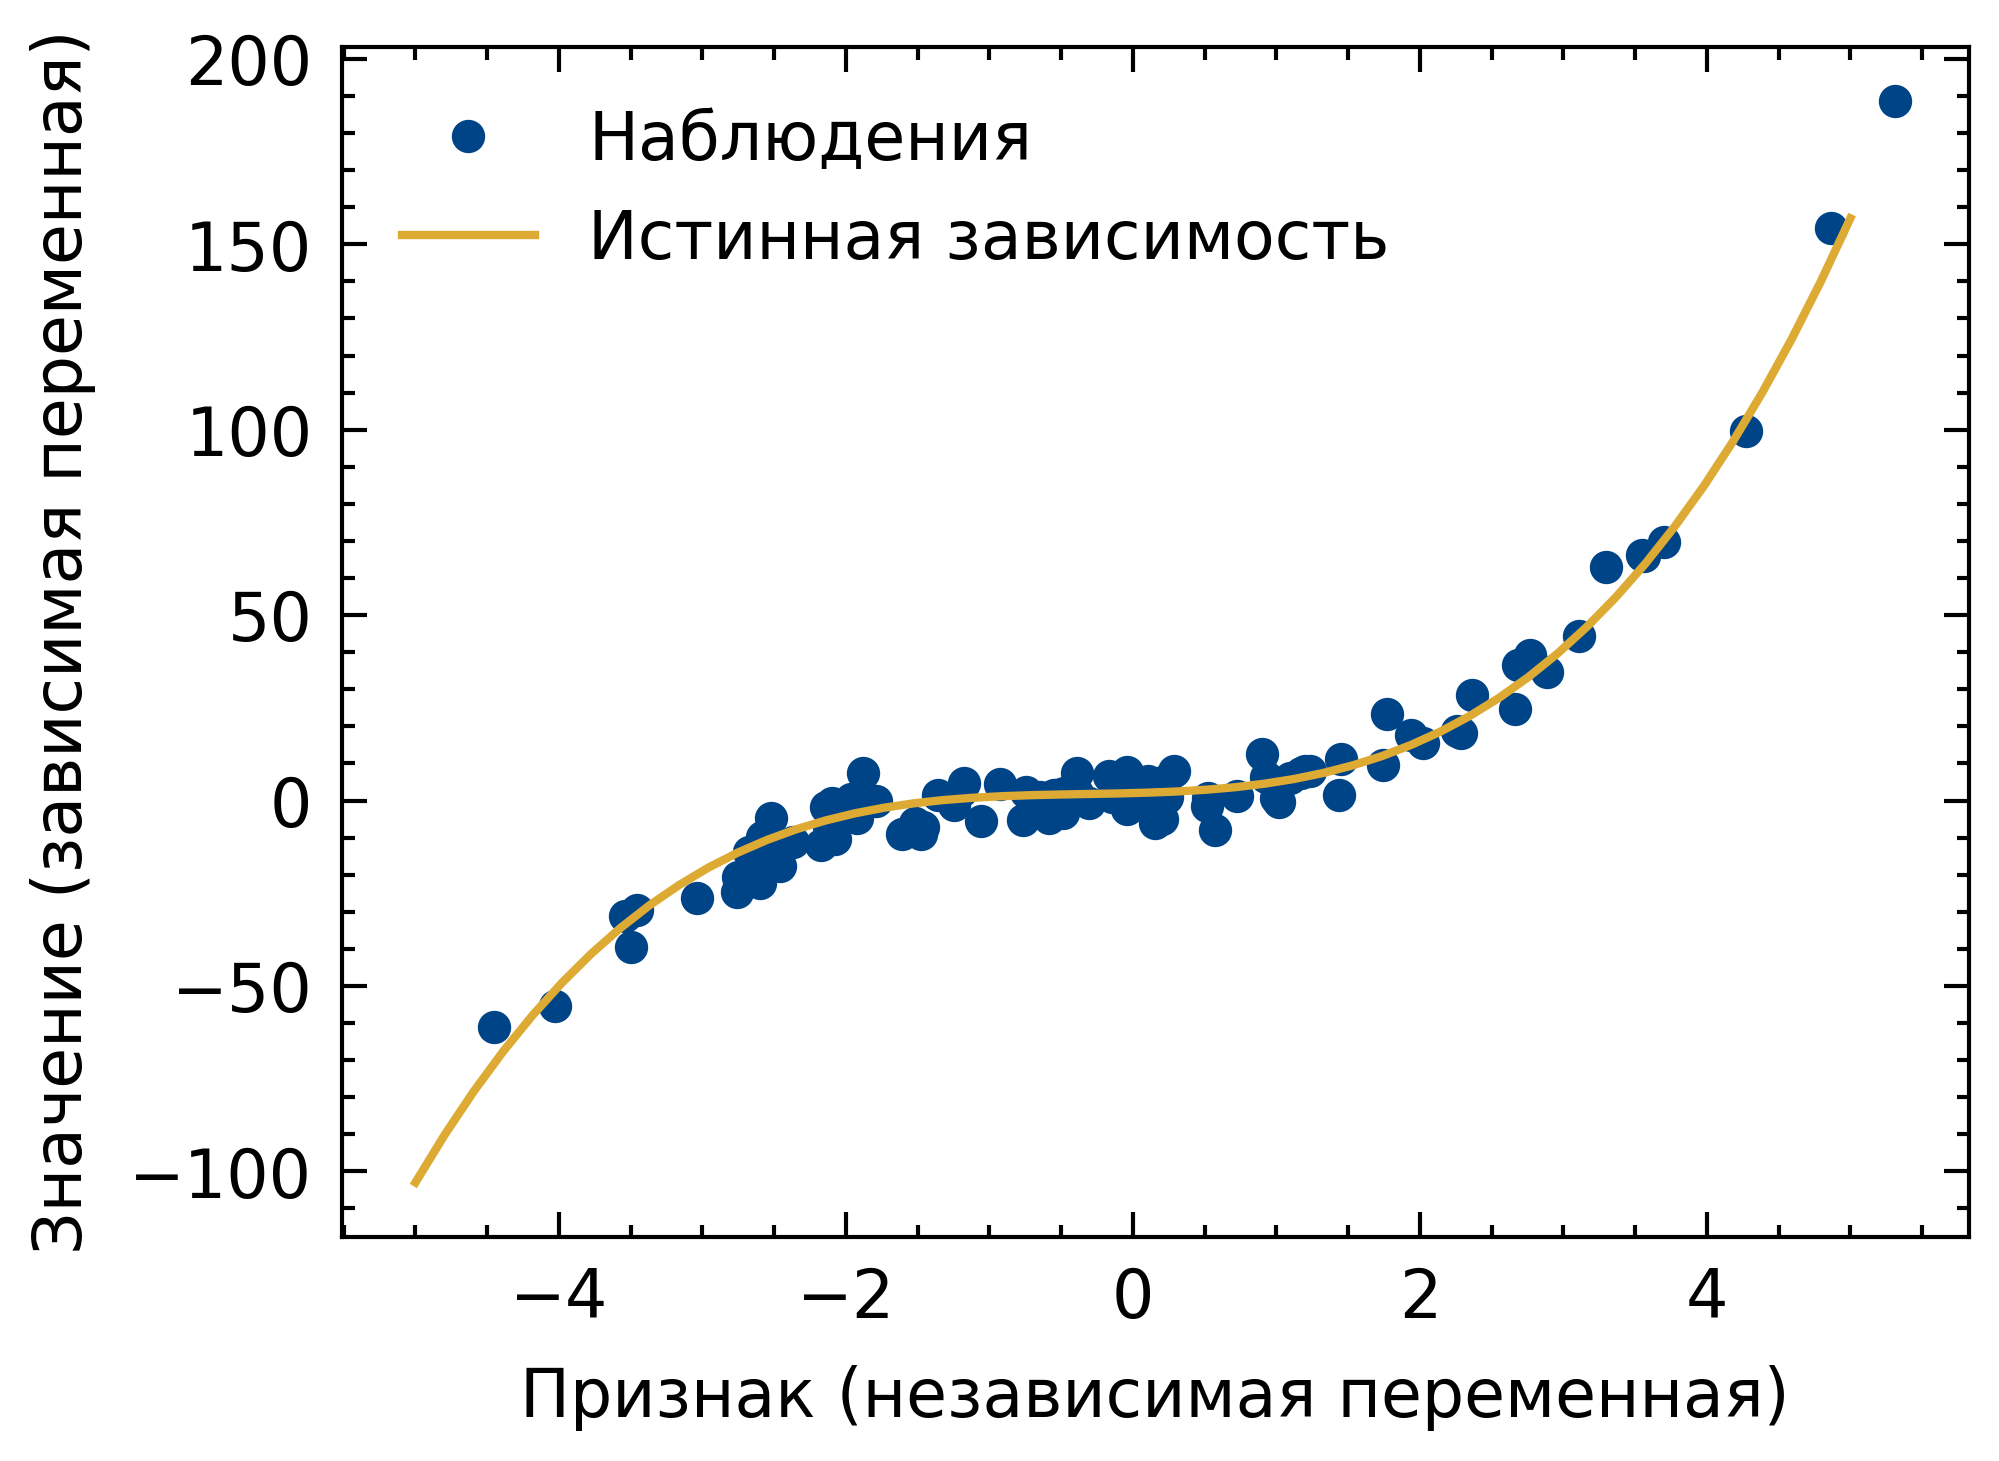

In [68]:
plt.plot(X, Y, '.', label='Наблюдения')
plt.plot(vals, f, label='Истинная зависимость')
plt.xlabel('Признак (независимая переменная)')
plt.ylabel('Значение (зависимая переменная)')
plt.legend()
plt.show()

# Как восстанавливать зависимости?

### Всегда возникает две идеи в таких случаях:

### 1. Идея (из математического анализа): давайте смотреть что происходит не глобально, а локально т.е. жить в какой-то окрестности точки

### 2. Идея (из линейной алгебры): бабахнуть прямую

## Идея 1

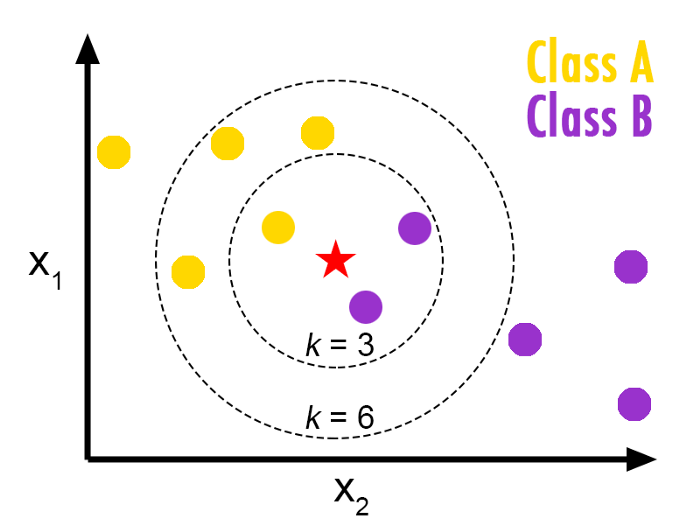

Источник: https://equipintelligence.medium.com/k-nearest-neighbor-classifier-knn-machine-learning-algorithms-ed62feb86582

Такой подход называется методом k ближайших соседей (K-Neares Neighbours или KNN)

## Идея 2

В случае регрессии мы хотим восстановить зависимость как линейную комбинацию наших признаков.

$$f(X) = \alpha * X + b$$, т.е. сделать просто **линейную регрессию** 

В случае классификации -- мы хотим найти прямую (гиперплоскость), которая разделит пространство на две части, и в одной части будет первый класс, а в другой -- второй.

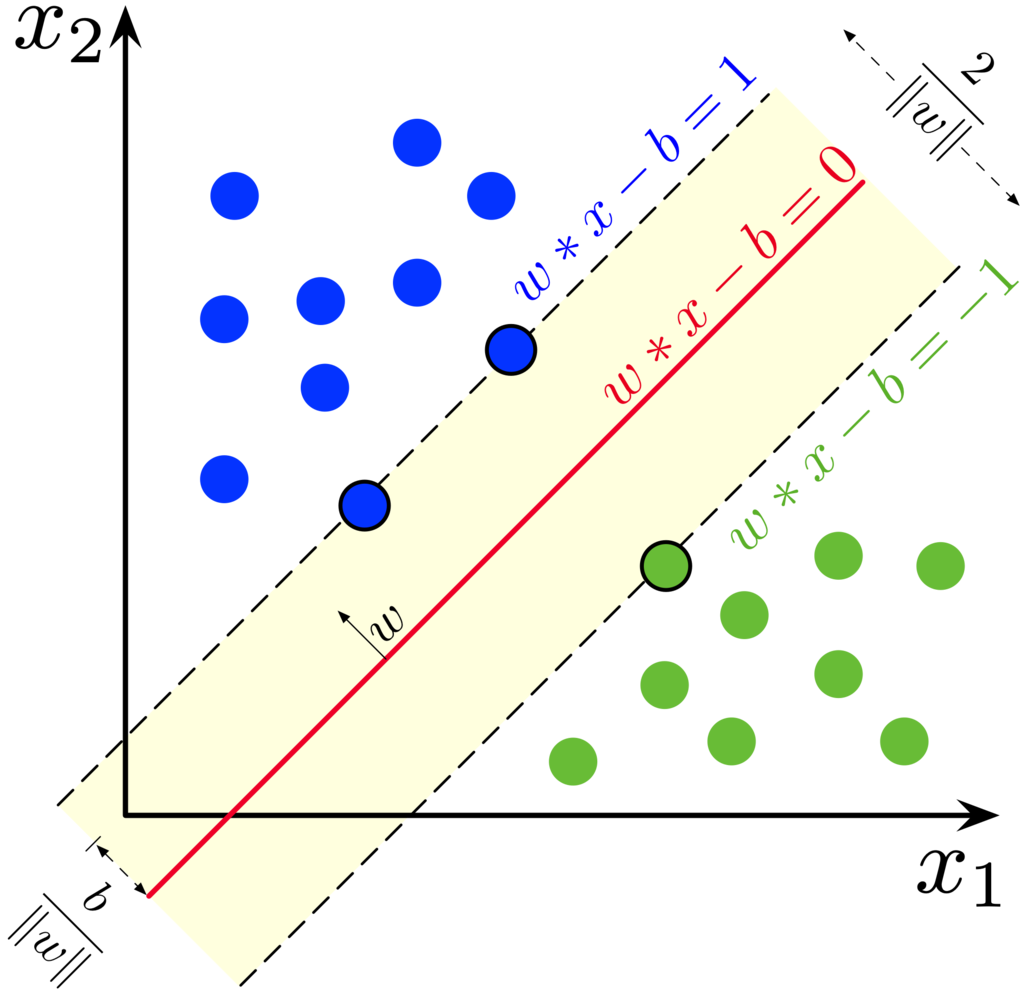

Источник: https://en.wikipedia.org/wiki/Support-vector_machine

Тут есть разные подходы. Например, **логистическая регрессия**:

$$ log\frac{p}{1-p} = \alpha_0 + \alpha_1 * X_1 + \alpha_2 * X_2$$, где p -- вероятность принадлежности к классу 1

Если выразить эту вероятность, то получится:

$$ p = \frac{1}{1 + e^{-(\alpha_0 + \alpha_1 * X_1 + \alpha_2 * X_2)}}$$

Или же, можно подойти к этому с другой стороны: пусть наша выборка линейно разделима. Тогда мы можем максимизировать расстояние между двумя классами. Для этого определим две плоскости:

$$ w^Tx - b = 1 $$
$$ w^Tx - b = -1$$

Тогда расстояние между двумя плоскостями это $\frac{2}{||w||}$ и максимизация расстяния -- это минимизация ||w||. Разделяющая плоскость -- это та, что проходит ровно по середине. Этот подход называется SVM

## Возникает логичный вопрос: а как искать эту прямую?

В случае линейной регресии мы просто минимизируем квадрат отклонения:

$$ ||Y - \alpha * X - b || \rightarrow min$$

В случае SVM мы решаем оптимизационную задачу вида:

$$ ||w|| \rightarrow min, y_i(w^Tx_i - b) \geq 0$$

С логистической регрессией немного посложнее, необходимо максимизировать правдоподобие (что это такое можно почитать здесь https://en.wikipedia.org/wiki/Likelihood_function)

In [56]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

LinearRegression()

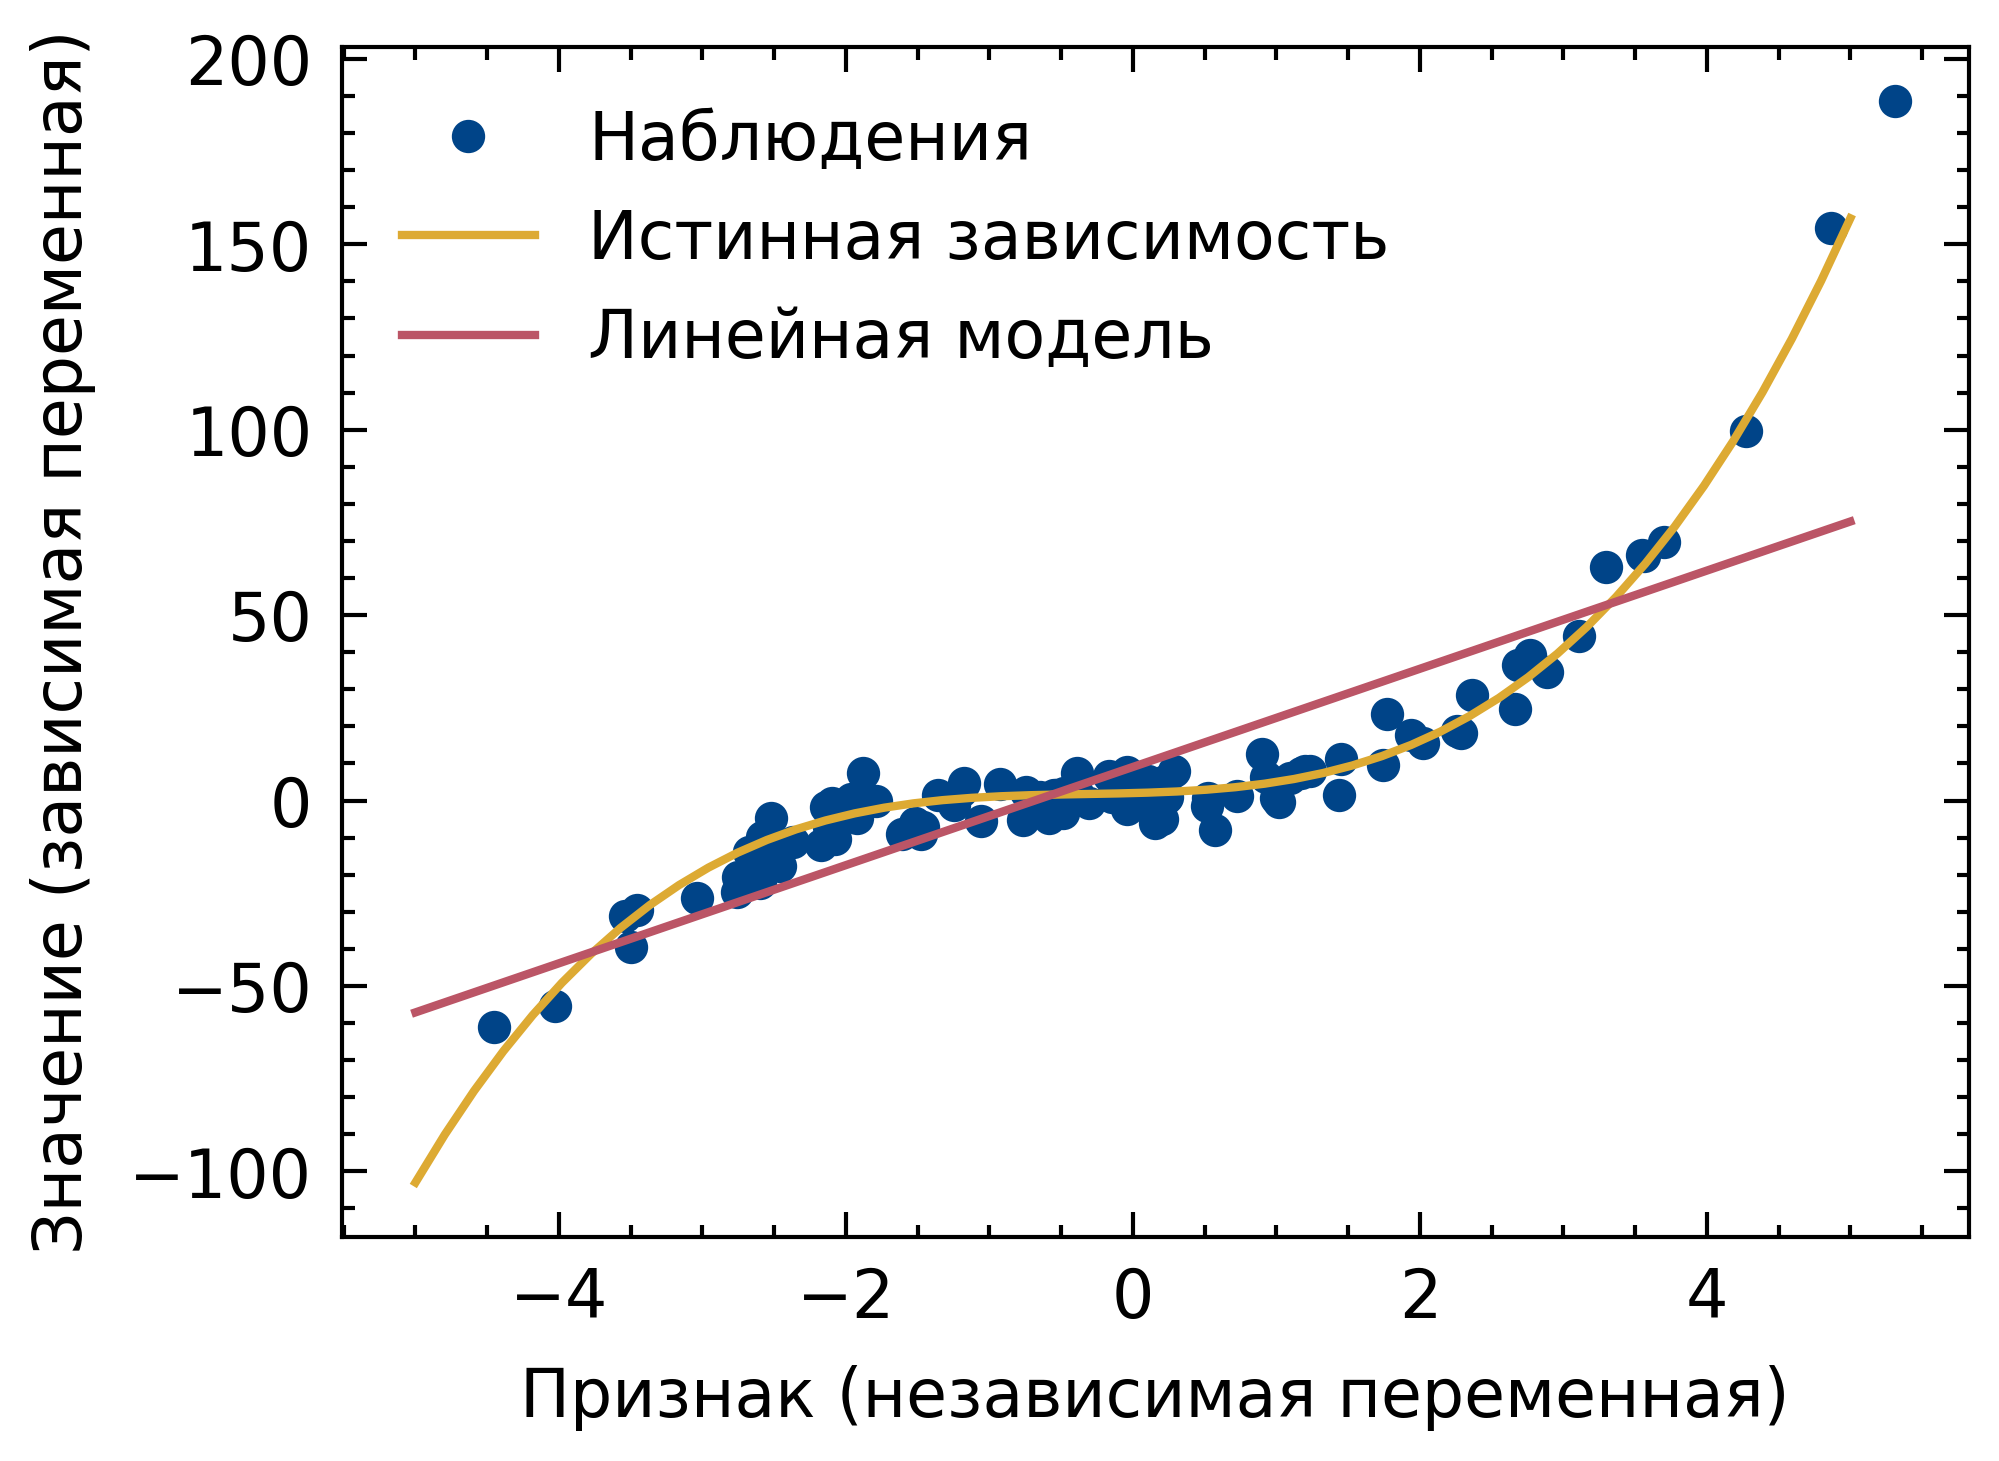

In [69]:
plt.plot(X, Y, '.', label='Наблюдения')
plt.plot(vals, f, label='Истинная зависимость')
plt.plot(vals, model.predict(vals.reshape(-1, 1)), label='Линейная модель')
plt.xlabel('Признак (независимая переменная)')
plt.ylabel('Значение (зависимая переменная)')
plt.legend()
plt.show()

# Очевидная проблема: мир нелинеен. Что делать с этим?

### Идея: учить линейную модельку не на самих признаках, а на каких-то нелинейных преобразованиях признаков. 

В качестве примера для регрессии можно взять признаки $X$, $X^2$, $X^3$ и учить вот такую модельку:

$$f(X) = \alpha_0 + \alpha_1 * X + \alpha_2 * X^2 + \alpha_3 * X^3$$

Здесь уже получится нелинейная моделька, которая саппроксимирует вашу зависимость

In [72]:
model = LinearRegression()
model.fit(np.stack([X, X**2, X**3]).T, Y.reshape(-1, 1))

LinearRegression()

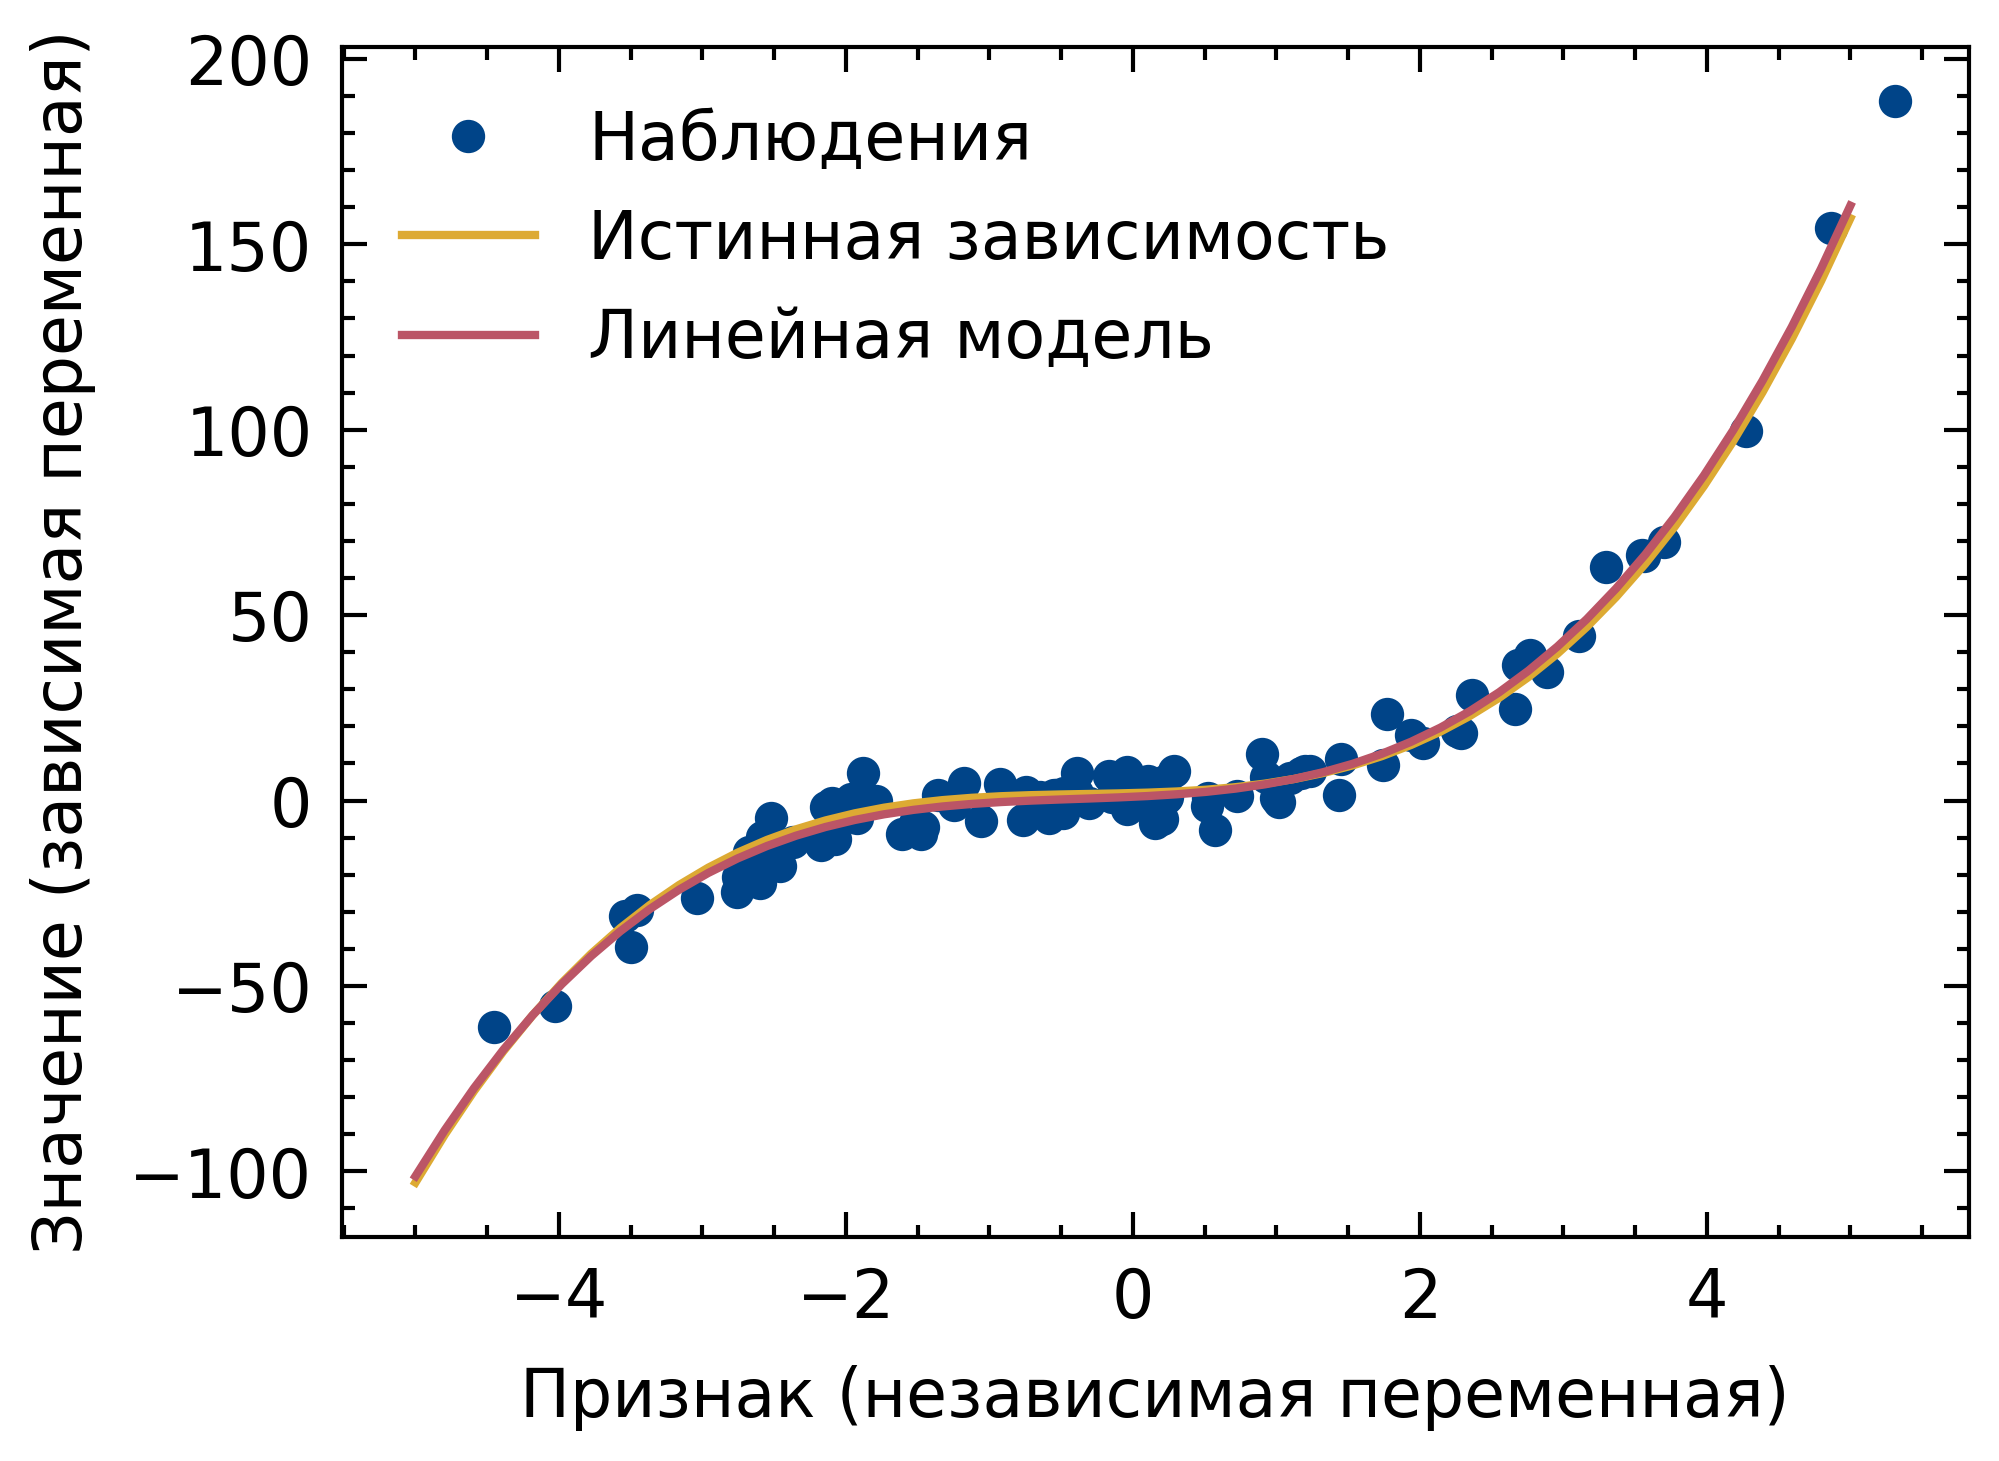

In [75]:
plt.plot(X, Y, '.', label='Наблюдения')
plt.plot(vals, f, label='Истинная зависимость')
plt.plot(vals, model.predict(np.stack([vals, vals**2, vals**3]).T), label='')
plt.xlabel('Признак (независимая переменная)')
plt.ylabel('Значение (зависимая переменная)')
plt.legend()
plt.show()

А вот примеры нелинейности для классификации

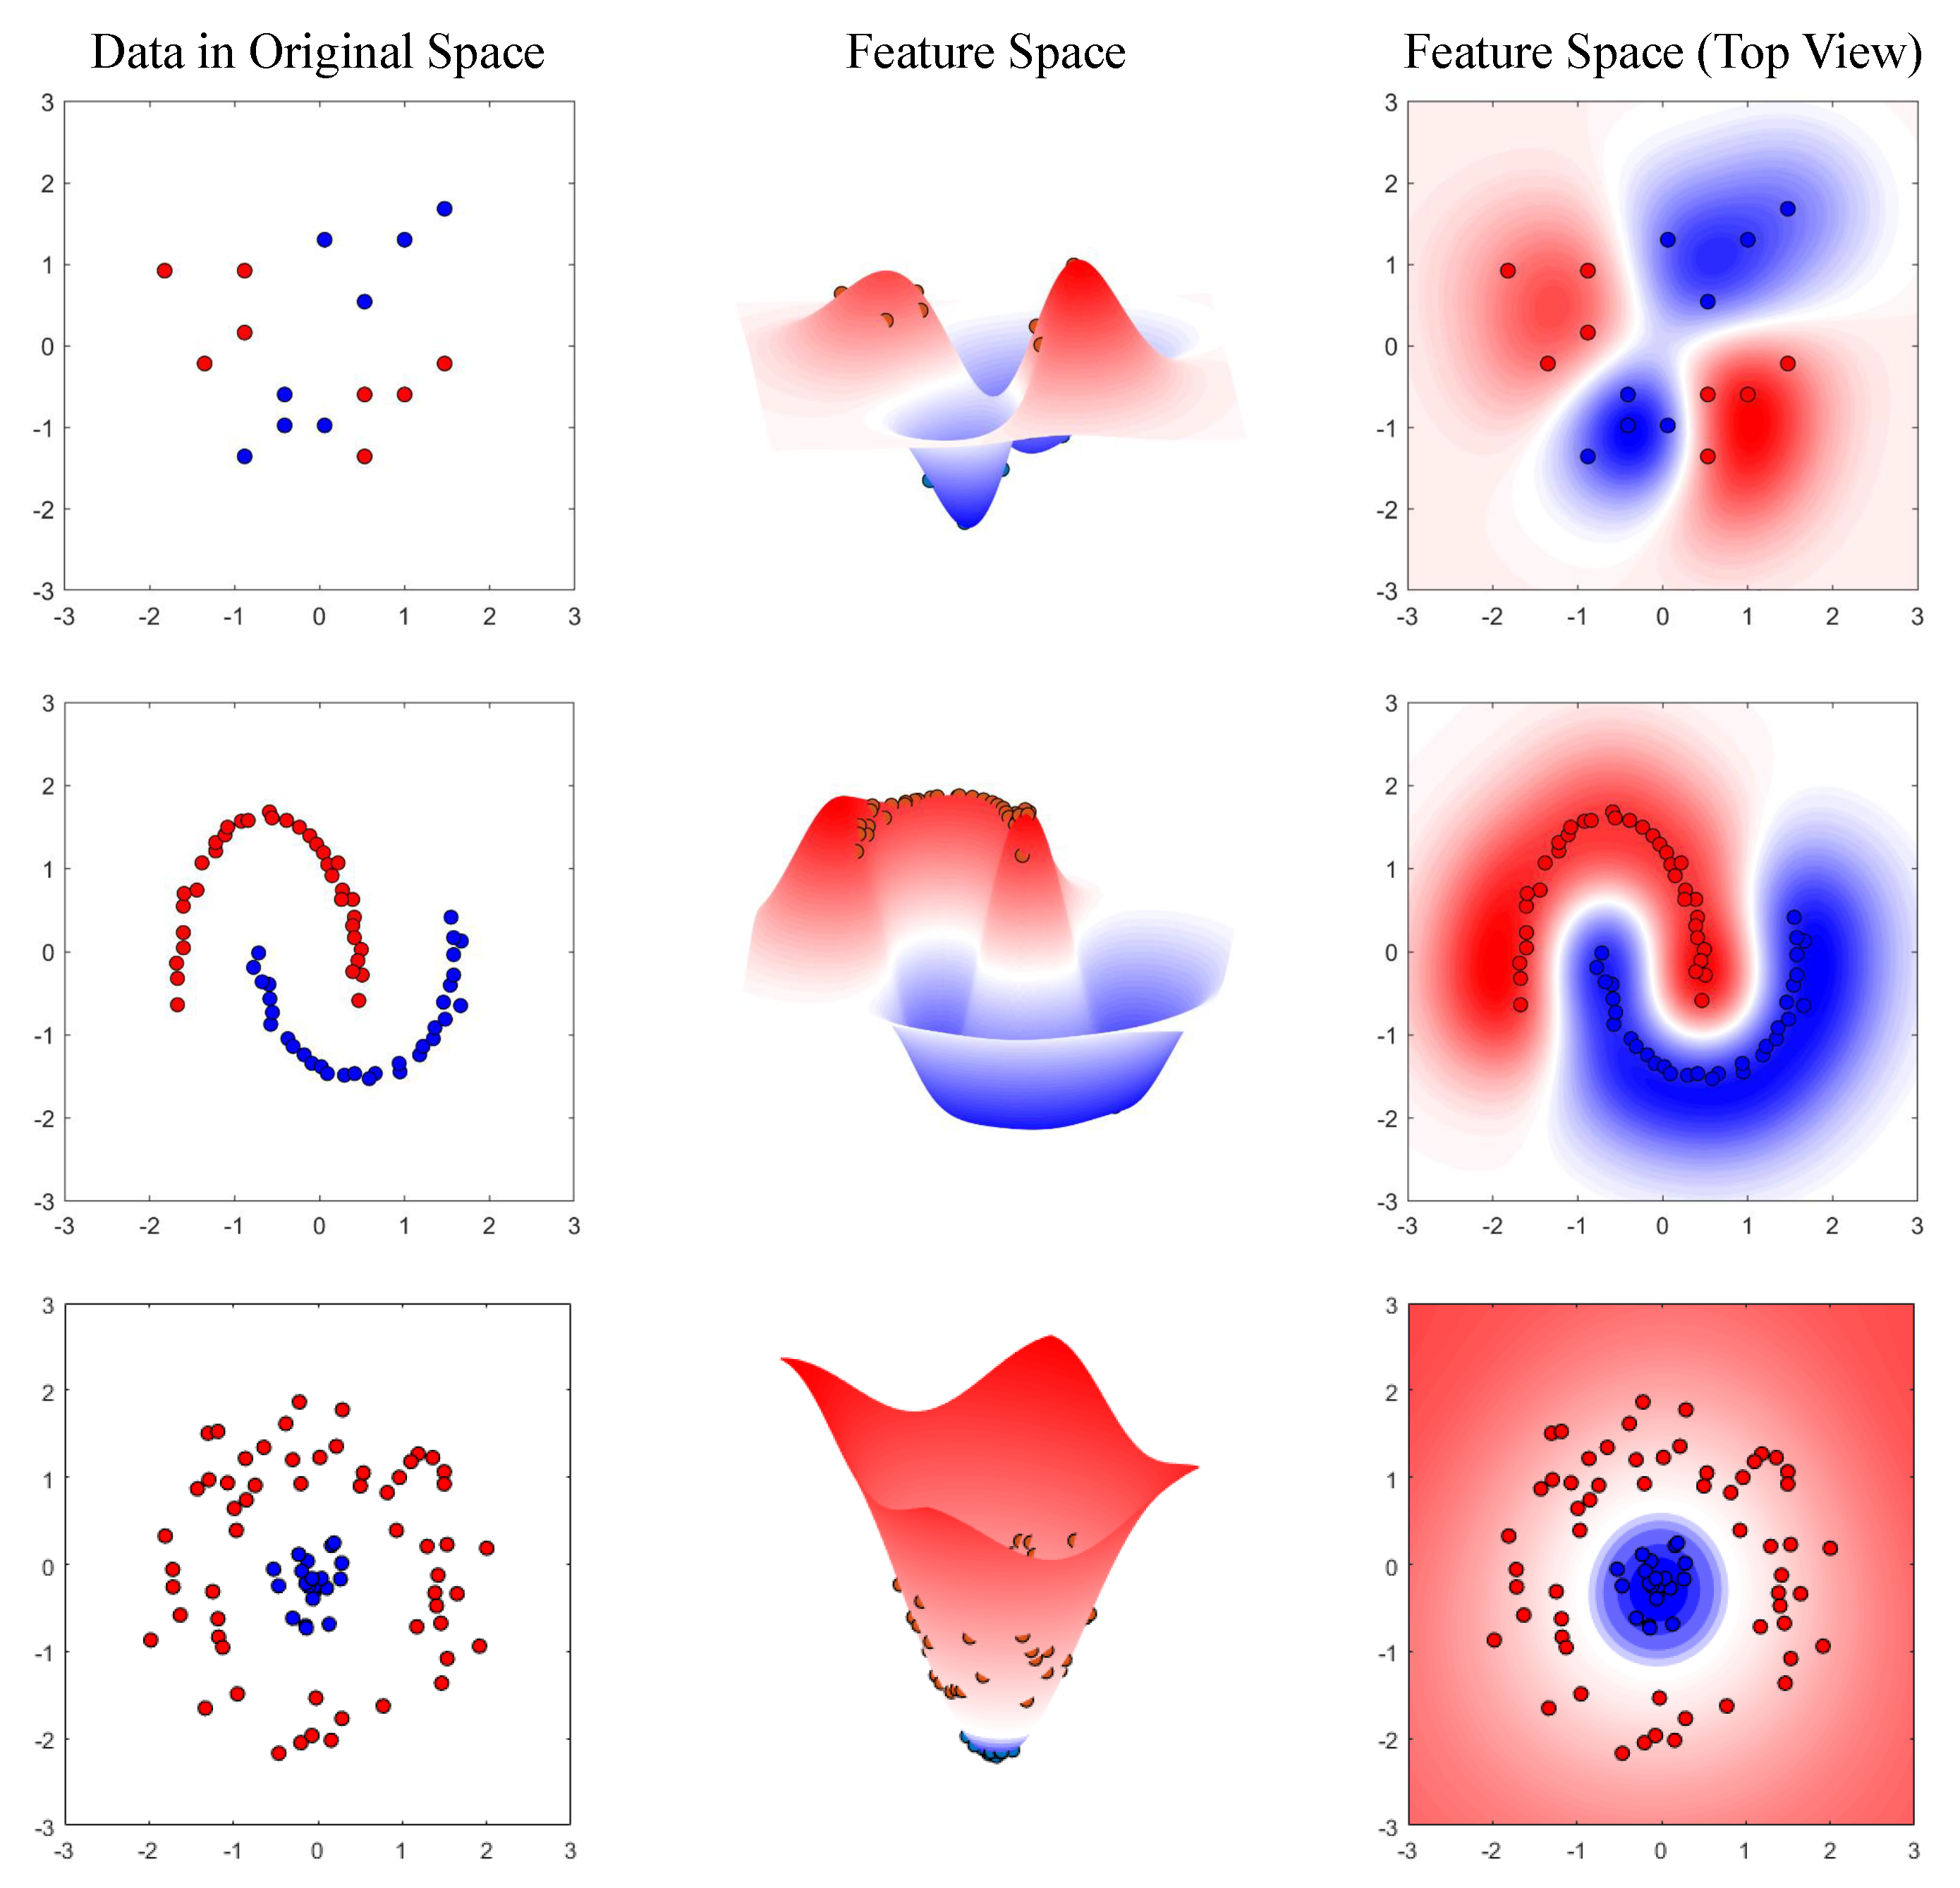

Источник: https://www.mdpi.com/2227-9717/8/1/24/htm

В случае SVM можно использовать ядра, которые позволят представить ваши признаки в другом пространстве (https://en.wikipedia.org/wiki/Support-vector_machine)

### Идея: попробовать другой класс алгоритмов

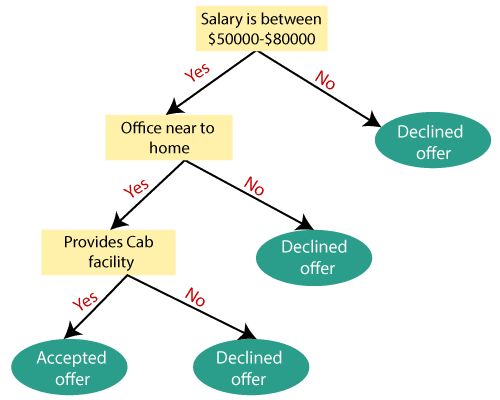

Источник: https://www.mygreatlearning.com/blog/decision-tree-algorithm/

Есть много разных реализаций дерева, но суть их обычно в том, что берётся информационный критерии и максимизируется при каждом разбиении

Проблема тут в том, что одно дерево очень слабое. **Демократия спасёт нас!**

Можно учить не одно дерево, а много деревьев и сделать так, чтобы они проголосовали за варианты ответа. За какой вариант больше, тот и возьмём. **Но как учить?**. Если запускать постоянно на одной и той же выборке, то и ответ всегда будет один и тот же 

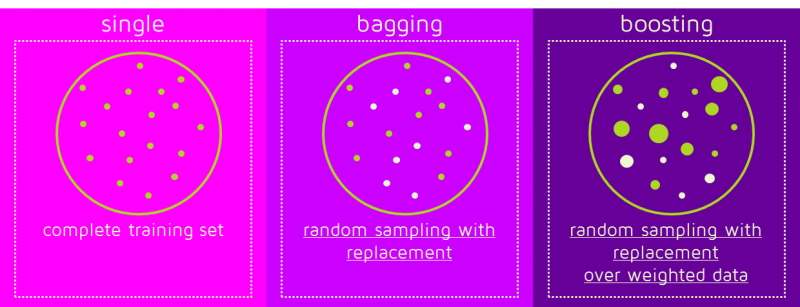

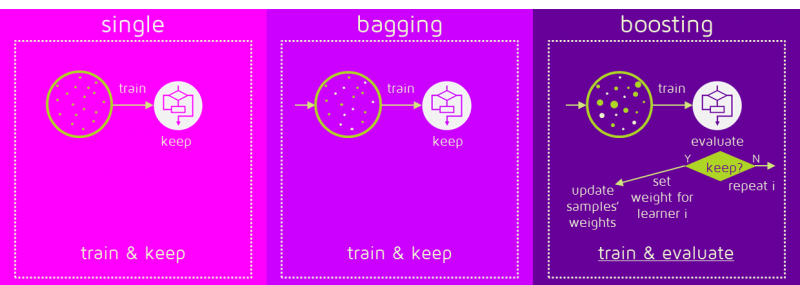

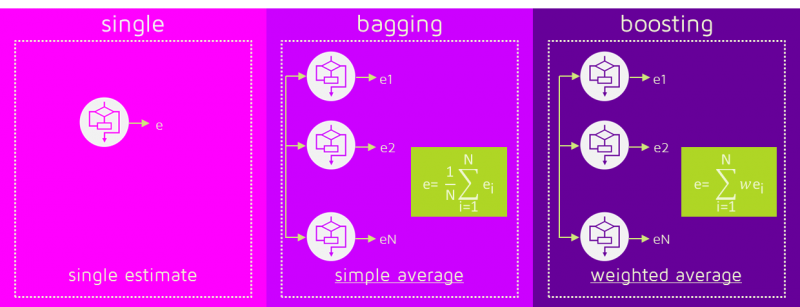

Источник: https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

Минутка интересных фактов:

- Оч плохая идея пытаться учить линейную регрессию для классификации
- SVM, DecisionTrees, RandomForest, XGBoost работают как для задачи классификации, так и для рагрессии
- Логистическая регрессия -- это линейный метод!!!
- SVM может быть как линейным, так и нелинейным (всё зависит от ядра)
